**Hi everyone!!
Welcome to my 'Employee Churn Prediction' evaluation notebook.**
- Here I demonstarte  my skills and knowledge in building and evaluating machine learning models to classify Churning of employees.It is a binary classification between churned or not churned.
- The goal of this project is to build a model that can accurately predict the Churning of an Employee based on their Work experience,salary,projects,evaluations and personal information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [2]:
df.shape

(14999, 10)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [5]:
#finding the mean or sum of people who left(1) and did not leave(0) the company
left = df.groupby('left')
left.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [6]:
low=df.groupby('salary')
low.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


In [7]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


As we can interpret from the analyzing results:
- it can be seen that people who left the company had very low satisfaction rates,there average monthly hours were also almost greater than other people.
- The employees with low salary also have very less satisfaction rate,their promotion rate is also very low as compared to other two groups even thoigh the number of projects they are working on and average monthly hours for them is as equal to other with low salary.**


# Data Visualization

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    11428
1     3571
Name: left, dtype: int64

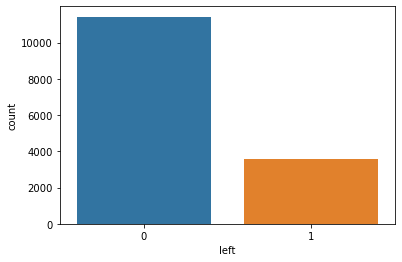

In [8]:
sns.countplot('left',data=df)
df.left.value_counts()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='number_project', ylabel='count'>

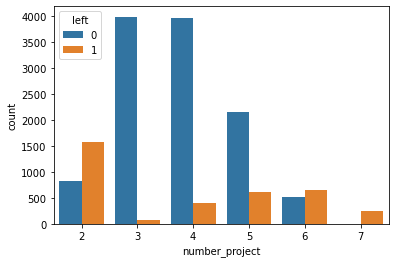

In [9]:
sns.countplot('number_project',data=df,hue='left')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time_spend_company', ylabel='count'>

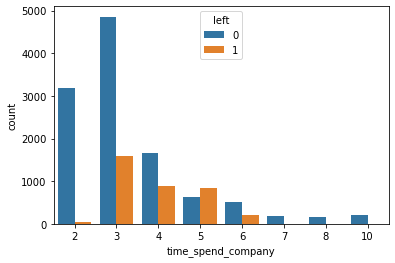

In [10]:
sns.countplot('time_spend_company',data=df,hue='left')

**INTERPRETATION**

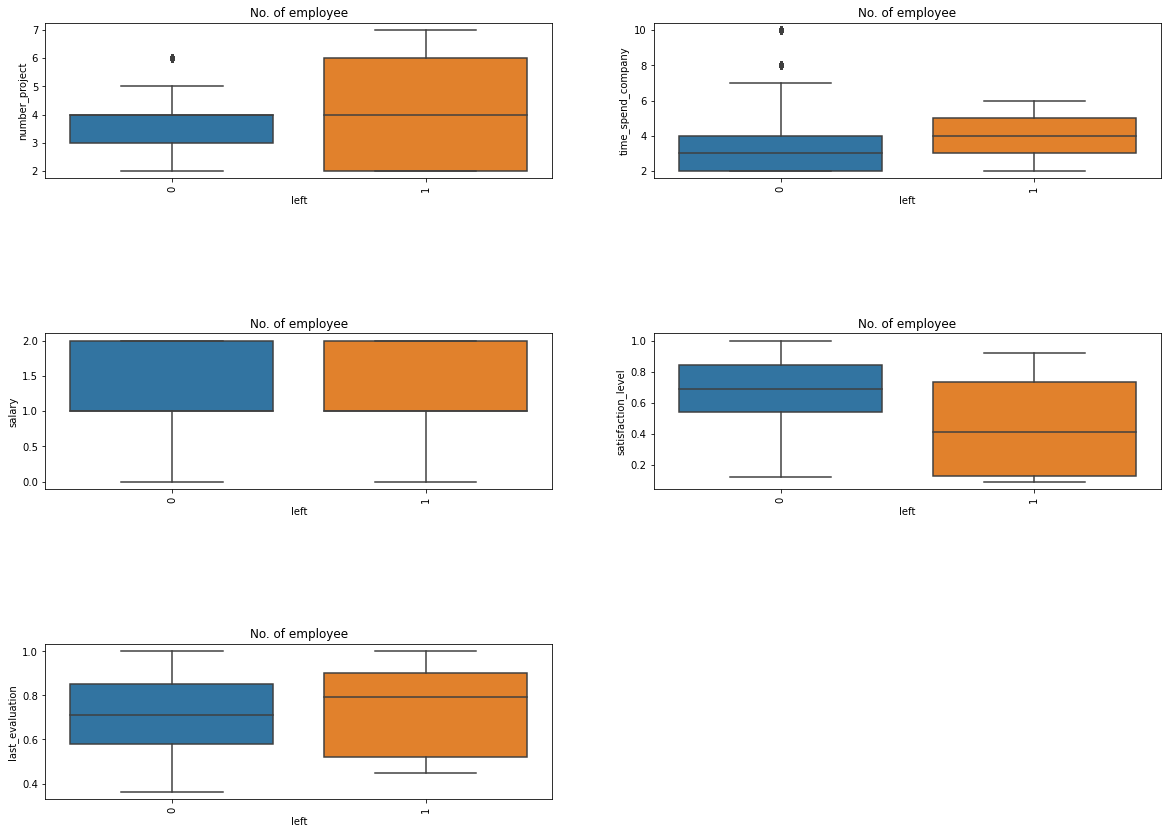

In [71]:
features=['number_project','time_spend_company','salary','satisfaction_level','last_evaluation']
fig=plt.subplots(figsize=(20,20))
for i, j in enumerate(features):
        plt.subplot(4, 2, i+1)       
        plt.subplots_adjust(hspace = 1.0)
        sns.boxplot(x='left',y=j,data = df)
        plt.xticks(rotation=90)
        plt.title("No. of employee")

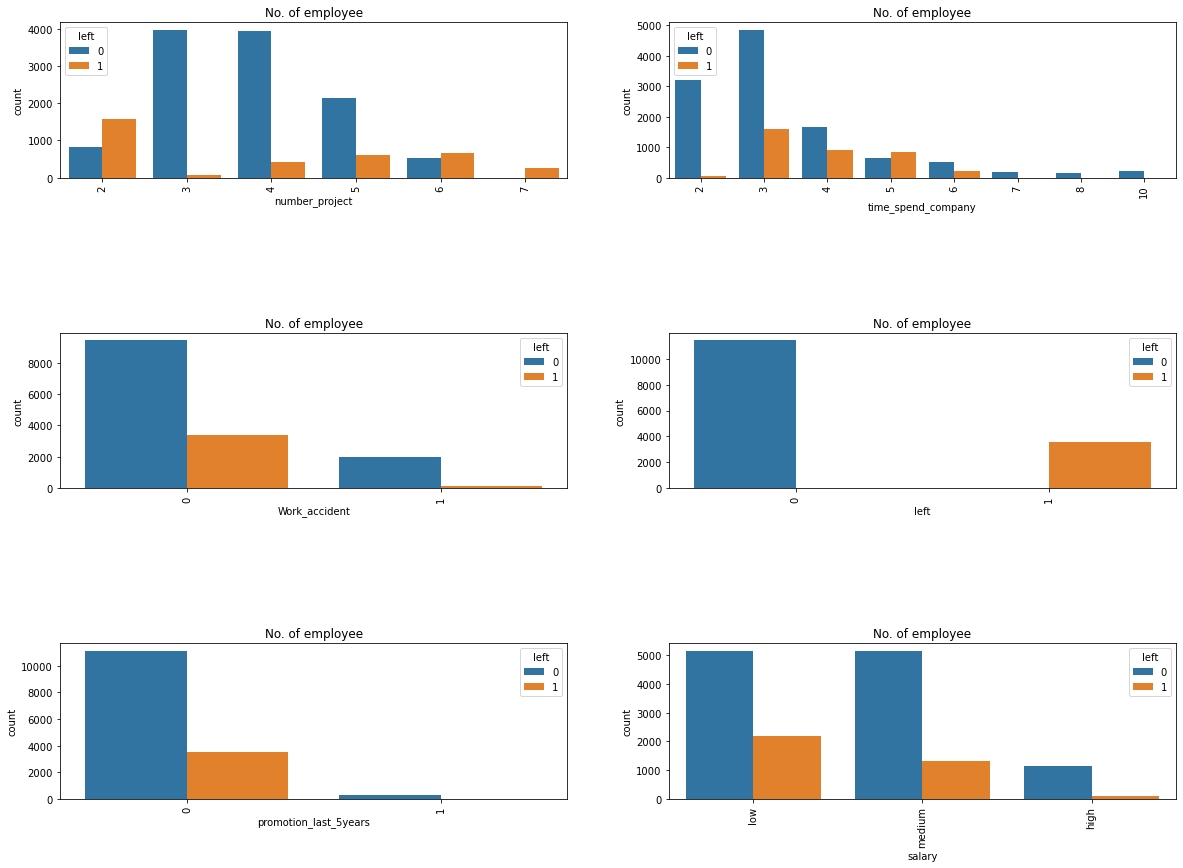

In [11]:
features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','salary']
fig=plt.subplots(figsize=(20,20))
for i, j in enumerate(features):
        plt.subplot(4, 2, i+1)       
        plt.subplots_adjust(hspace = 1.0)
        sns.countplot(x=j,data = df, hue='left')
        plt.xticks(rotation=90)
        plt.title("No. of employee")

As it can be noticed from the visualizations
- The number of employees who left the company are more with low salary and then medium salary. the leaving rates for high salary is very low.
- The employees with no promotion in last 5 years have more frequency of leaving the company.
- Employees with mostly experience of 3-6 years are more obvious to leave the company.The rates of leaving company with experience of 3-6 years is high.
- Employees with lesser number of projects are prone to leave the company.

The following features are most influencing a person to leave the company:

- Promotions: Employees are far more likely to quit their job if they haven’t received a promotion in the last 5 years.
- Time with Company: Here, The three-year mark looks like a time to be a crucial point in an employee’s career. most of them quit their job around the three-year mark. Another important point is the 6-year point, where the employee is very unlikely to  leave.
- Number Of Projects: Employee engagement is another critical factor to influence the employee to leave the company. Employees with 3–5 projects are less likely to leave the company. The employee with fewer and more projects are likely to leave.
- Salary: Most of the employees quit among the mid or low-salary groups.

# CLUSTERING ANALYSIS

- From the dataset it can be seen there are many factors affecting the Churn of the employees,we can observe and segment them into clusters/groups which can help in easily interpret our data.
- It can be observed that the most important factor for any employee to stay or leave is satisfaction,salary and  performance in the company. so let’s bunch them into groups of people using cluster analysis that is branch of unsupervised learning.
- Kmeans algortihm can be applied to know the patterns,but since it can be used for continous data,we can find patterns and relations among satifaction level and last evalaution

In [12]:
from sklearn.cluster import KMeans    #importing kmeans clustering algorithm
left_emp=df[['satisfaction_level','last_evaluation']][df.left==1]
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)


In [13]:
left_emp['label'] = kmeans.labels_


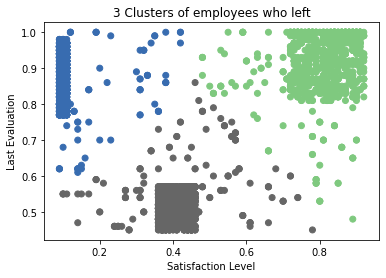

In [14]:
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

- It can be cleary observed that there are clusters mostly among high evaluation points to the employee but low satisfaction.
- average satifiscation and low evaluation points to the employee.
- And the last with high satisfaction and high evaluation points.

- To understand these factors,one more branch of data science, sentimental analysis is required to know why there are such sentiments and emotions of the employee regarding high and low evaluation points parallel to the satisfaction level and churning rates.


# DATA PREPROCESSING

In [60]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
df['salary']=le.fit_transform(df['salary'])
df['Department']=le.fit_transform(df['Department'])
df['salary'].head()

0    1
1    2
2    2
3    1
4    1
Name: salary, dtype: int64

In [16]:
X=df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'Department', 'salary']]
y=df['left']
# Import train_test_split function
from sklearn.model_selection import train_test_split,GridSearchCV

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# MODEL BUILDING AND TESTING

**NAIVE BAYES CLASSIFIER WITH CROSS-VALIDATION HYPERPARAMETER TUNING**

In [17]:
#building model using naive baye's algortihm 
from sklearn.naive_bayes import GaussianNB
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nb=GaussianNB()
nb_cv = GridSearchCV(nb,param_grid=param_grid_nb,cv =10)
nb_cv.fit(X_train,y_train)
y_pred_nb=nb_cv.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [19]:
print("Accuracy: ",accuracy_score(y_test,y_pred_nb))


Accuracy:  0.8548888888888889


**LOGISTIC REGRESSION CLASSIFIER**

In [26]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(penalty='l2')
lg_cv=GridSearchCV(lg,param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},cv=5)
lg_cv.fit(X_train,y_train)
y_pred_lg=lg_cv.predict(X_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [27]:
accuracy_score(y_test,y_pred_lg)

0.7642222222222222

**GRADIENT BOOSTING CLASSIFIER**

In [39]:
from sklearn.experimental import enable_hist_gradient_boosting



In [41]:
gb = GradientBoostingClassifier()

In [42]:
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [43]:
y_pred_gb = gb.predict(X_test)

In [45]:
accuracy_score(y_test,y_pred_gb)

0.9715555555555555

In [46]:
print(confusion_matrix(y_test,y_pred_gb))

[[3385   43]
 [  85  987]]


**COMPARISION OF ALGORITHMS**
- Naive bayes classifier with the hyper parameter tuning and cross validation gave us the accuracy level of 85% which is pretty good for prediction of data.
- Using logistic regression classifier with l2 norm and with the use of hyper parameter tuning and cross validation the accuracy rates were 76% which is moderate for this data.Which implies that Logistic regression is not that much suitable for this data and can perform better for other datasets.
- Gradient boosting classifier which is the combination of ensembing techniques and various weak algorithms together resulted in 97% accuracy rates which is very good. The performance of the model is very good compared to other two classifiers and can be suggested that Gradient boosting classifier is very much suitable for prediction of unseen data further.

**testing the output with single X vector**

In [63]:
X_new=[[0.67,0.86,3,262,6,0,0,7,1]]


In [64]:
gb.predict(X_new)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "The feature names should match those that were passed during fit.\n"


array([0], dtype=int64)

**RESULTS**
- by using the gradient boosting classifier,the prediction for the above X vector of single row is resulted to be not left for 0.67 satisfaction level,0.86 evaluation points,3 years of experience,high salary.
- Since these features were most important to the Churn of employee and can be predicted by seeing that for high evaluation and moderate satifaction level with high salary,the employee apparently will not Exit the company.
- The gradient boosting classifier gave the highest accuracy of 97%,which implies that the prediction of the above X vector is 97% accurate as compared to other algorithms with low accuracy levels.
